# Plot curves for some specific sera

In [1]:
import pickle
import pandas as pd
import neutcurve
import numpy as np
import altair as alt

Get variables passed by `snakemake`:

In [3]:
curvefits_pickle = snakemake.input.curvefits_pickle
plot_pdf = snakemake.output.plot_pdf
ngsneuttiters = pd.read_csv("results/aggregated_titers/titers.csv")

Read the `neutcurve.CurveFits` for all the fits from the pickle file:

In [4]:
print(f"Reading `CurveFits` from {curvefits_pickle=}")

with open(curvefits_pickle, "rb") as f:
    fits_seqbasedneut = pickle.load(f)

Reading `CurveFits` from curvefits_pickle='results/aggregated_titers/curvefits.pickle'


Read in the data from the GFP based neutralization assay

In [5]:
pooledsera_datafile = './traditional_neutralization_assay_validations/231122_passagedvirus_D10066D10175D10366D10378_fracinfectivity.csv'
data = pd.read_csv(pooledsera_datafile)
data = data.replace('HI19','A/Hawaii/70/2019')
data = data.replace('Eng22','A/England/220200318/2022')
data = data.replace('WI19',"A/Wisconsin/588/2019")
data

,serum,concentration,replicate,virus,fraction infectivity,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,D10066_day0,0.016667,1,A/Hawaii/70/2019,1.085642,NaN,NaN,NaN,NaN,NaN
1,D10066_day0,0.005556,1,A/Hawaii/70/2019,1.321345,NaN,NaN,NaN,NaN,NaN
2,D10066_day0,0.001852,1,A/Hawaii/70/2019,1.213689,NaN,NaN,NaN,NaN,NaN
3,D10066_day0,0.000617,1,A/Hawaii/70/2019,1.212344,NaN,NaN,NaN,NaN,NaN
4,D10066_day0,0.000206,1,A/Hawaii/70/2019,0.988708,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
379,D10378_day182,0.000617,2,A/England/220200318/2022,0.953999,NaN,NaN,NaN,NaN,NaN
380,D10378_day182,0.000206,2,A/England/220200318/2022,1.113009,NaN,NaN,NaN,NaN,NaN
381,D10378_day182,0.000069,2,A/England/220200318/2022,1.142425,NaN,NaN,NaN,NaN,NaN
382,D10378_day182,0.000023,2,A/England/220200318/2022,0.902121,NaN,NaN,NaN,NaN,NaN


In [6]:
data['fraction infectivity'] = np.where(data['fraction infectivity']>1,1,data['fraction infectivity'])
data['replicate'] = "replicate"+data['replicate'].astype(str)

In [12]:
serumnames = data['serum'].tolist()
mapped_names = {}
mapped_days = {}
for i in serumnames:
    indiv = i[0:6]
    day= i[7:]
    rename = indiv
    mapped_names[i] = rename
    mapped_days[i]=day
data['individual'] = data['serum'].map(mapped_names)
data['day'] = data['serum'].map(mapped_days)

In [13]:
fits_traditionalneut = neutcurve.CurveFits(data, fixtop=False)
fits_traditionalneut.sera

['D10066_day0',
 'D10066_day182',
 'D10175_day0',
 'D10175_day182',
 'D10366_day0',
 'D10366_day182',
 'D10378_day0',
 'D10378_day182']

Plot curves for specific sera and viruses of interest (note that there are **tons** of curves in `fits` so we would not want to plot them all):

/home/aloes/miniconda3/envs/seqneut-pipeline/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


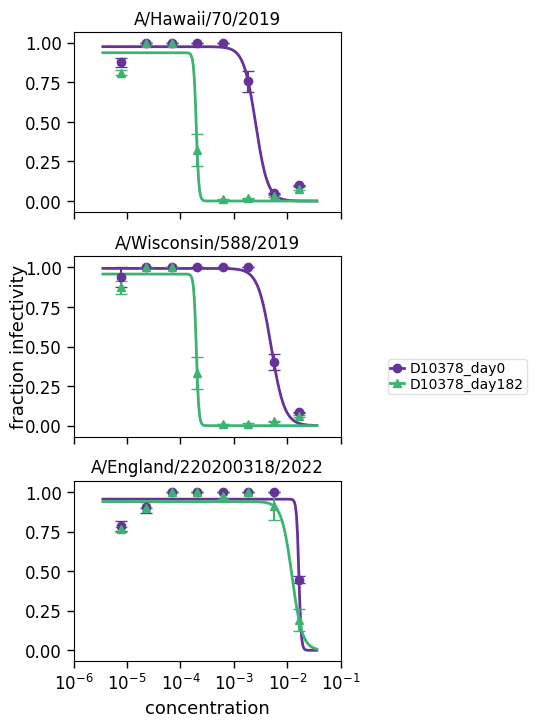

In [14]:
fig, ax = fits_traditionalneut.plotViruses(
    sera=[
 'D10378_day0',
 'D10378_day182'],
    viruses=["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=1,
    attempt_shared_legend=True,
    titlesize=12,
    labelsize=13,
    ticksize=12,
    max_sera_per_subplot=8,
#    colors=['#999999', '#009E73'],
    colors=['rebeccapurple','mediumseagreen'],
    legendfontsize=10,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1,
    linewidth=2
)

print(f"Saving to {plot_pdf=}")
fig.savefig("results/plots_for_paper/Fig4_curves_GFP.svg")

Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


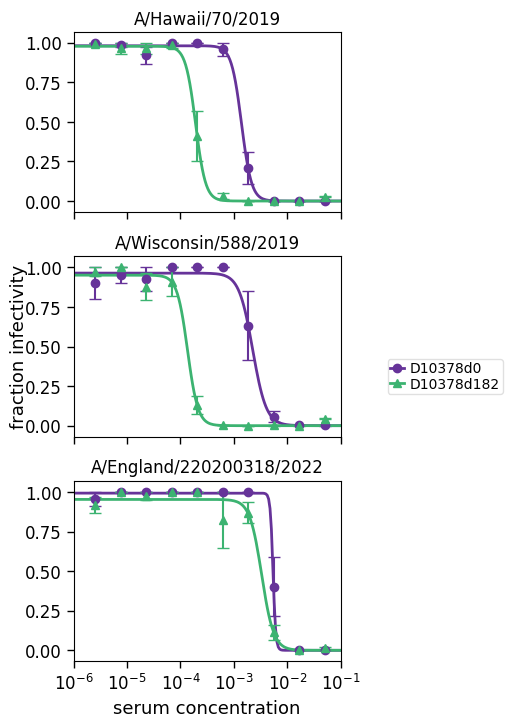

In [15]:
fig, ax = fits_seqbasedneut.plotViruses(
    sera=[
 'D10378d0',
 'D10378d182'],
    viruses=["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=1,
    attempt_shared_legend=True,
    titlesize=12,
    labelsize=13,
    ticksize=12,
    max_sera_per_subplot=8,
#    colors=['#999999', '#009E73'],
    colors=['rebeccapurple','mediumseagreen'],
    legendfontsize=10,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1,
    linewidth=2
)

print(f"Saving to {plot_pdf=}")
fig.savefig("results/plots_for_paper/Fig4_curves_NGS.svg")

Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'
Saving to plot_pdf='results/plots_for_paper/plot_specific_sera/curves.pdf'


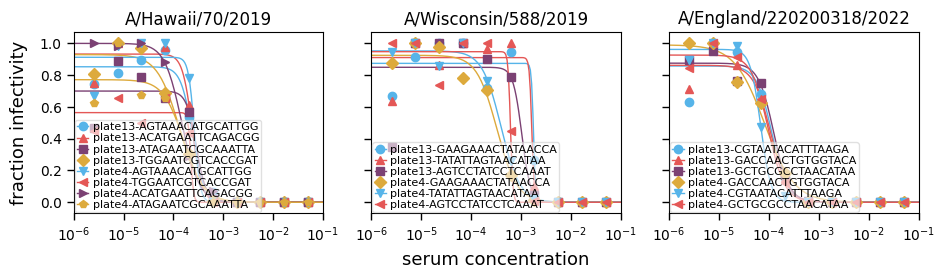

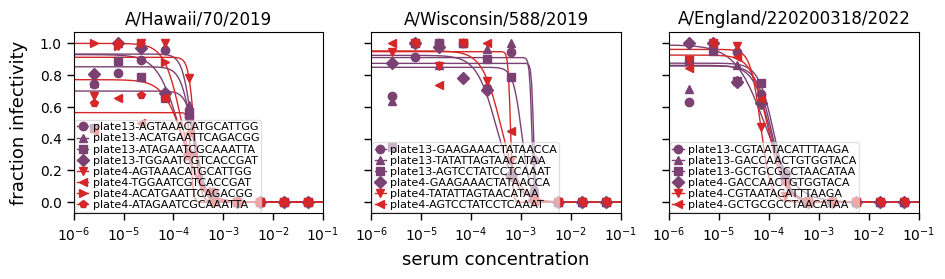

In [16]:
 fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d30"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=3,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#56B4E9', '#e45756','#7b4173',"#DDAA3C"],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1,
    subplot_titles = "{virus}"
)

print(f"Saving to {plot_pdf=}")
fig.savefig(plot_pdf)

 fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d30"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022"],
    ncol=3,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#7b4173','#7b4173','#7b4173','#7b4173','#d62728','#d62728','#d62728','#d62728'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1,
    subplot_titles = "{virus}"
)

print(f"Saving to {plot_pdf=}")
fig.savefig(plot_pdf)



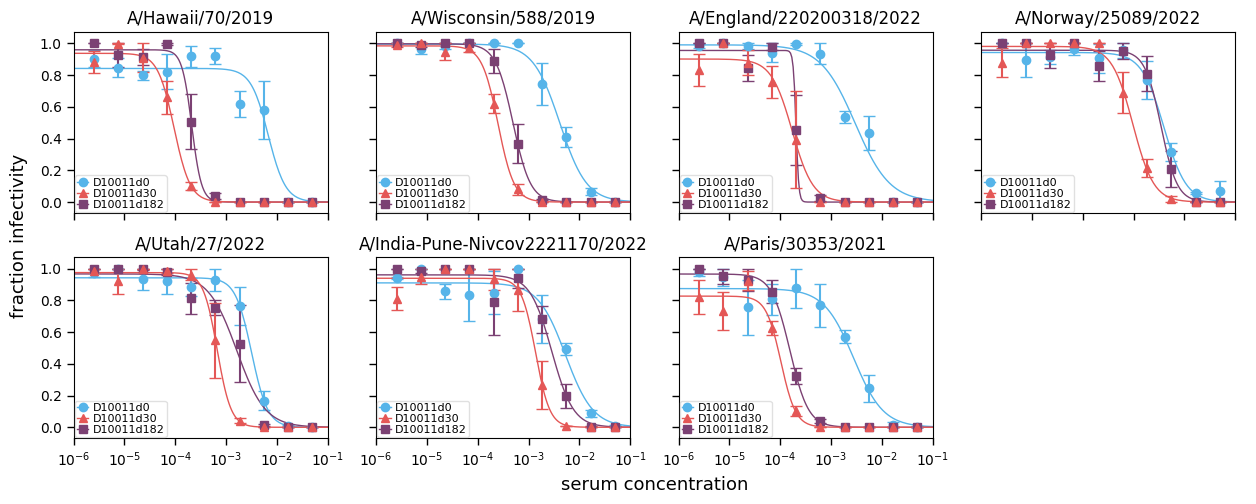

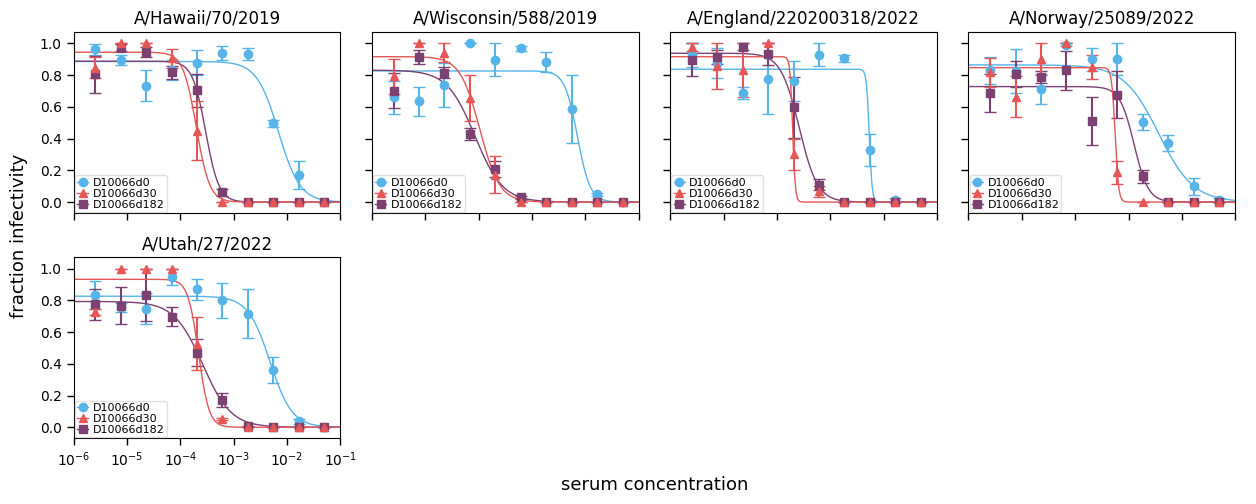

In [17]:
 fig, ax = fits_seqbasedneut.plotViruses(
    sera=["D10011d0","D10011d30","D10011d182"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022","A/Norway/25089/2022","A/Utah/27/2022",'A/India-Pune-Nivcov2221170/2022','A/Paris/30353/2021',],
    ncol=4,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#56B4E9', '#e45756','#7b4173',"#DDAA3C"],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1
)

 fig, ax = fits_seqbasedneut.plotViruses(
    sera=["D10066d0","D10066d30","D10066d182"],
    viruses=["A/Hawaii/70/2019","A/Wisconsin/588/2019","A/England/220200318/2022","A/Norway/25089/2022","A/Utah/27/2022"],
    ncol=4,
    attempt_shared_legend=False,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    colors=['#56B4E9', '#e45756','#7b4173',"#DDAA3C"],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1
)

In [18]:
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],
    ncol=24,
    attempt_shared_legend=False,
    titlesize=10,
    labelsize=11,
    ticksize=8,
    legendfontsize=8,
    widthscale=0.8,
    subplot_titles = "{serum} against \n {virus}"
)
fig.savefig("results/plots_for_paper/SupplementalPlate1curves3_forslide.png")

Error in callback <function flush_figures at 0x7f850b5418a0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

KeyboardInterrupt: 

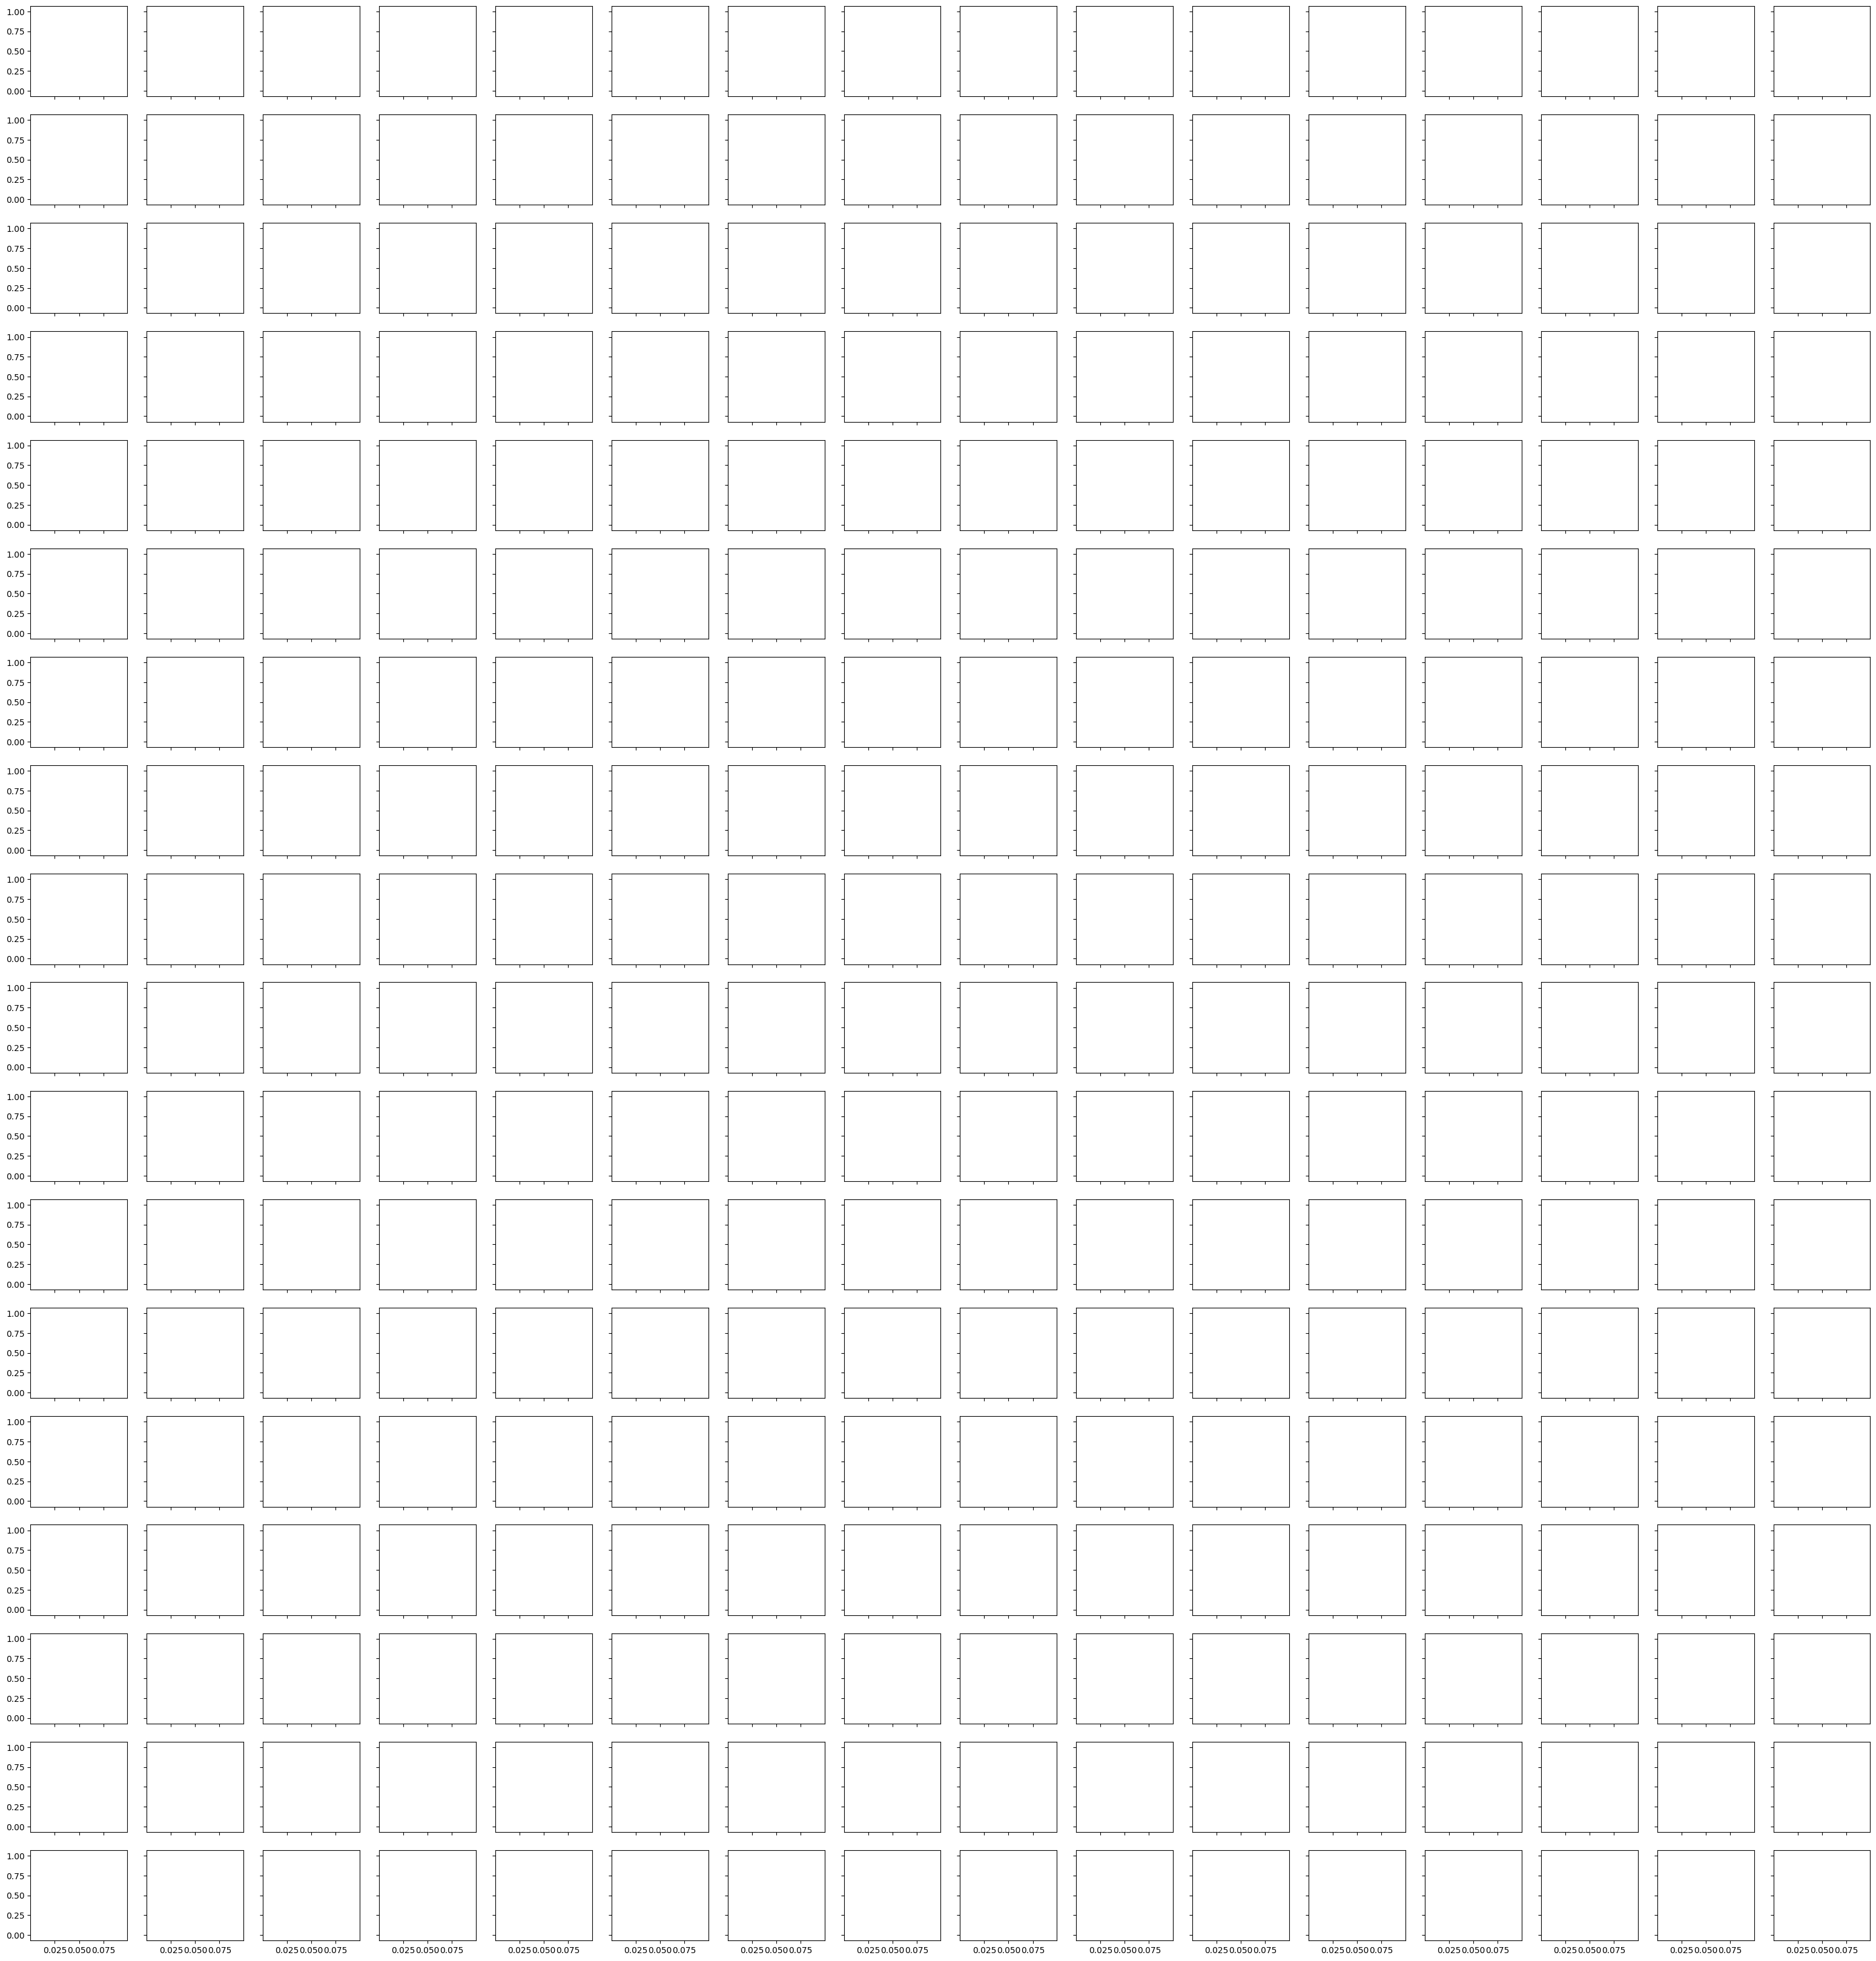

In [19]:
#Plot all replicates on a single plate (this takes an eon)
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],
    ncol=16,
    attempt_shared_legend=False,
    titlesize=10,
    labelsize=11,
    ticksize=8,
    legendfontsize=8,
    widthscale=0.8,
    subplot_titles = "{serum} against \n {virus}"
)
fig.savefig("results/plots_for_paper/SupplementalPlate1curves3.svg")
#sera=["D10002d0","D10002d30","D10323d0","D10323d30","D10323d182","D10318d0","D10318d30","D10318d182"],

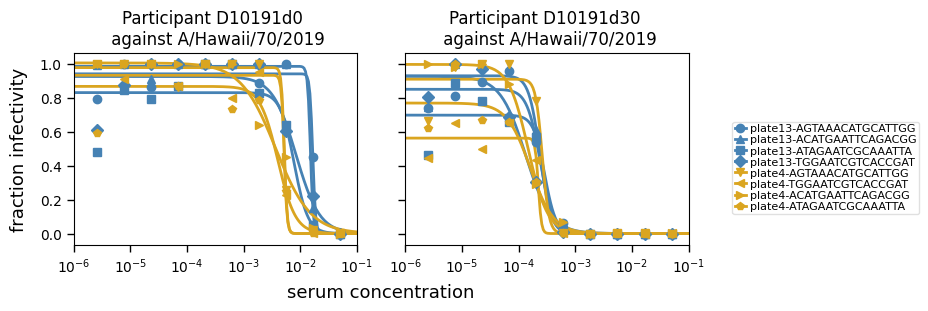

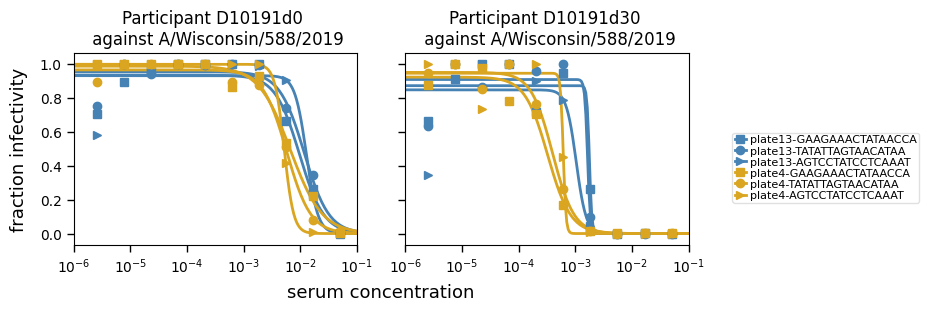

In [20]:
#Plot subset of curves for example figure
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d0", "D10191d30"],
    viruses=["A/Hawaii/70/2019"],
    ncol=3,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    attempt_shared_legend=True,
#    colors=['#9467bd','#9467bd','#9467bd','#9467bd','#17becf','#17becf','#17becf','#17becf'],
    colors=['steelblue','steelblue','steelblue','steelblue','goldenrod','goldenrod','goldenrod','goldenrod'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    widthscale=1.1,
    heightscale=1.1,
    subplot_titles = "Participant {serum} \n against {virus}",
    linewidth=2
)
fig.savefig("results/plots_for_paper/Fig3_curves2.svg")
fig, ax = fits_seqbasedneut.plotReplicates(
    sera=["D10191d0","D10191d30"],
    viruses=["A/Wisconsin/588/2019"],
    ncol=3,
    titlesize=12,
    labelsize=13,
    ticksize=10,
    attempt_shared_legend=True,
#    colors=['#9467bd','#9467bd','#9467bd','#9467bd','#17becf','#17becf','#17becf','#17becf'],
    colors=['steelblue','steelblue','steelblue','goldenrod','goldenrod','goldenrod'],
#    colors=['#00573f', '#009e73', '#00e3a5', '#bcf7e7'],
    legendfontsize=8,
    fix_lims={'xmin':0.000001,'xmax':0.1},
    markers=['s','o','>'],
    widthscale=1.1,
    heightscale=1.1,
    subplot_titles = "Participant {serum} \n against {virus}",
    linewidth=2
)
fig.savefig("results/plots_for_paper/Fig3_curves1.svg")

In [21]:
#Make a dataframe with just the sera and strains that were validated by GFP assay
listofvalidations = ['D10378d0','D10378d182','D10366d0','D10366d182','D10175d0','D10175d182','D10066d0','D10066d182']
validatedviruses = ["A/Hawaii/70/2019", "A/Wisconsin/588/2019","A/England/220200318/2022"]
NGSNeuttiters_validated = ngsneuttiters.loc[ngsneuttiters['serum'].isin(listofvalidations)]
NGSNeuttiters_validated = NGSNeuttiters_validated.loc[NGSNeuttiters_validated['virus'].isin(validatedviruses)]
NGSNeuttiters_validated

,serum,virus,titer,titer_bound,titer_sem,n_replicates,titer_as
623,D10066d0,A/England/220200318/2022,190.5,interpolated,19.74,3,midpoint
626,D10066d0,A/Hawaii/70/2019,151.9,interpolated,15.39,4,midpoint
647,D10066d0,A/Wisconsin/588/2019,163.9,interpolated,36.39,3,midpoint
659,D10066d182,A/England/220200318/2022,4302.0,interpolated,1540.00,3,midpoint
662,D10066d182,A/Hawaii/70/2019,3625.0,interpolated,691.60,4,midpoint
683,D10066d182,A/Wisconsin/588/2019,12560.0,interpolated,1678.00,3,midpoint
1019,D10175d0,A/England/220200318/2022,1599.0,interpolated,39.48,3,midpoint
1022,D10175d0,A/Hawaii/70/2019,10370.0,interpolated,1885.00,4,midpoint
1043,D10175d0,A/Wisconsin/588/2019,1738.0,interpolated,76.15,3,midpoint
1055,D10175d182,A/England/220200318/2022,3132.0,interpolated,477.30,3,midpoint


In [22]:
# We named these with a different format in the GFP file, need to make a list of names that can be reconciled
serumnames = NGSNeuttiters_validated['serum'].tolist()
mapped_names = {}
for i in serumnames:
    indiv = i[0:6]
    day= i[7:]
    rename = indiv + "_day" + day
    mapped_names[i] = rename
NGSNeuttiters_validated['serum_rename'] = NGSNeuttiters_validated['serum'].map(mapped_names)
NGSNeuttiters_validated = NGSNeuttiters_validated.drop(columns=['n_replicates','titer_sem','titer_bound']).rename(columns={"nt50": "nt50_seqneut","serum_rename": "serum_GFPname"})
NGSNeuttiters_validated

,serum,virus,titer,titer_as,serum_GFPname
623,D10066d0,A/England/220200318/2022,190.5,midpoint,D10066_day0
626,D10066d0,A/Hawaii/70/2019,151.9,midpoint,D10066_day0
647,D10066d0,A/Wisconsin/588/2019,163.9,midpoint,D10066_day0
659,D10066d182,A/England/220200318/2022,4302.0,midpoint,D10066_day182
662,D10066d182,A/Hawaii/70/2019,3625.0,midpoint,D10066_day182
683,D10066d182,A/Wisconsin/588/2019,12560.0,midpoint,D10066_day182
1019,D10175d0,A/England/220200318/2022,1599.0,midpoint,D10175_day0
1022,D10175d0,A/Hawaii/70/2019,10370.0,midpoint,D10175_day0
1043,D10175d0,A/Wisconsin/588/2019,1738.0,midpoint,D10175_day0
1055,D10175d182,A/England/220200318/2022,3132.0,midpoint,D10175_day182


In [23]:
#Calculate NT50 for traditional neut assay and drop unused columns
fitsdf = fits_traditionalneut.fitParams()
fitsdf["Reciprocal_ic50"] = 1/fitsdf['ic50']

GFPneuts = fitsdf.loc[fitsdf['ic50_bound'] == 'interpolated']
GFPneuts = GFPneuts.drop(columns=['replicate','ic50_str','midpoint','slope','top','bottom','nreplicates','ic50_bound']).rename(columns={"Reciprocal_ic50": "nt50_GFPneut","serum":"serum_GFPname"})

/home/aloes/miniconda3/envs/seqneut-pipeline/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/aloes/miniconda3/envs/seqneut-pipeline/lib/python3.11/site-packages/neutcurve/hillcurve.py:955: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)


In [24]:
#Merge GFP neuts file and NGS neuts file
mergeddf = GFPneuts.merge(NGSNeuttiters_validated,on=['serum_GFPname','virus'])
mergeddf

,serum_GFPname,virus,ic50,midpoint_bound,midpoint_bound_type,r2,nt50_GFPneut,serum,titer,titer_as
0,D10066_day182,A/Hawaii/70/2019,0.000356,0.000355,interpolated,0.990066,2808.739571,D10066d182,3625.0,midpoint
1,D10066_day182,A/Wisconsin/588/2019,0.000192,0.000192,interpolated,0.993551,5205.459372,D10066d182,12560.0,midpoint
2,D10066_day182,A/England/220200318/2022,0.000597,0.000603,interpolated,0.937367,1675.299223,D10066d182,4302.0,midpoint
3,D10175_day0,A/Hawaii/70/2019,0.000075,0.000075,interpolated,0.988447,13314.571127,D10175d0,10370.0,midpoint
4,D10175_day0,A/Wisconsin/588/2019,0.000237,0.000237,interpolated,0.993421,4213.408098,D10175d0,1738.0,midpoint
5,D10175_day0,A/England/220200318/2022,0.000468,0.000489,interpolated,0.957690,2136.807927,D10175d0,1599.0,midpoint
6,D10175_day182,A/Hawaii/70/2019,0.000059,0.000059,interpolated,0.988676,16929.725452,D10175d182,14360.0,midpoint
7,D10175_day182,A/Wisconsin/588/2019,0.000074,0.000074,interpolated,0.993403,13587.191124,D10175d182,10560.0,midpoint
8,D10175_day182,A/England/220200318/2022,0.000597,0.000602,interpolated,0.967217,1676.121941,D10175d182,3132.0,midpoint
9,D10366_day0,A/Hawaii/70/2019,0.000220,0.000224,interpolated,0.948976,4548.549144,D10366d0,3402.0,midpoint


,ic50,midpoint_bound,r2,nt50_GFPneut,titer
ic50,1.000000,0.999920,-0.833347,-0.387009,-0.429537
midpoint_bound,0.999920,1.000000,-0.832263,-0.387204,-0.429728
r2,-0.833347,-0.832263,1.000000,0.362269,0.380518
nt50_GFPneut,-0.387009,-0.387204,0.362269,1.000000,0.886883
titer,-0.429537,-0.429728,0.380518,0.886883,1.000000


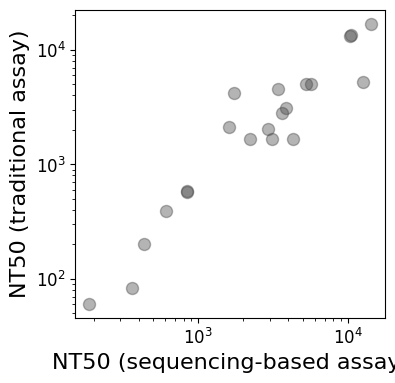

In [25]:
#Create a correlation plot and calculate the Pearson correlation
correlation = mergeddf.plot.scatter(y='nt50_GFPneut',x='titer',loglog=True,c='#444444',s=75, ylabel='NT50 (traditional assay)', xlabel="NT50 (sequencing-based assay)", fontsize=12,figsize=(4,4), alpha=0.4)
correlation.set_ylabel('NT50 (traditional assay)',fontdict= {'fontsize':16})
correlation.set_xlabel('NT50 (sequencing-based assay)',fontdict= {'fontsize':16})

correlation.figure.savefig("results/plots_for_paper/Fig4_correlation.svg")
mergeddf.corr(method="pearson",numeric_only=True)

In [26]:
#Create a column that just contains the day sampled
mergeddf['timepoint'] = mergeddf['serum'].str[7:]

In [27]:
#Create a plot of correlation colored by collection day
alt.Chart(mergeddf).mark_point(filled=True, size=75).encode( 
    x=alt.X('titer', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50 (Sequencing-based Assay)")), 
    y=alt.Y('nt50_GFPneut', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50 (Traditional Assay)")),
    color =alt.Color('timepoint:N', sort=['0','182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen']),
).properties(width = 250, height = 250).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=20).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=16
)

alt.Chart(...)

In [28]:
#Create file with fit parameters
fitsdfseqneut = fits_seqbasedneut.fitParams(no_average=True, average_only=False)

In [29]:
#Make a list of sera for which we have replicates
replicates = ['D10159','D10042','D10041','D10256','D10366','D10191']

In [30]:
#Pull data for sera with replicates from dataframe
sera_withreps = fitsdfseqneut.loc[fitsdfseqneut['serum'].str.contains('D10042|D10041|D10191|D10159|D10256|D10396')]

In [31]:
#Split replicates into separate dataframes
sera_with_rep1 = sera_withreps.loc[~sera_withreps['replicate'].str.contains('plate13|plate11')].drop(columns = ['nreplicates','ic50','ic50_bound','ic50_str','midpoint_bound','midpoint_bound_type','top','bottom','r2'])
sera_with_rep2 = sera_withreps.loc[sera_withreps['replicate'].str.contains('plate13|plate11')].drop(columns = ['nreplicates','ic50','ic50_bound','ic50_str','midpoint_bound','midpoint_bound_type','top','bottom','r2'])

In [32]:
#Label columns so that these can be merged and plotted
sera_with_rep1['NT50_rep1'] = 1/sera_with_rep1['midpoint']
sera_with_rep2['NT50_rep2'] = 1/sera_with_rep2['midpoint']
sera_with_rep1['barcode'] = sera_with_rep1['replicate'].str.split("-").str[1]
sera_with_rep2['NT50_rep2'] = 1/sera_with_rep2['midpoint']
sera_with_rep2['barcode'] = sera_with_rep2['replicate'].str.split("-").str[1]


merged_replicates = sera_with_rep1.merge(sera_with_rep2, on=['serum','virus','barcode'])

In [33]:
#Rename merged directory and calculate median
merged_replicates_withbarcodes = merged_replicates
merged_replicates = merged_replicates.drop(columns=['replicate_x','replicate_y','barcode'])
merged_replicates = merged_replicates.groupby(['serum','virus']).median().reset_index()
merged_replicates

,serum,virus,midpoint_x,slope_x,NT50_rep1,midpoint_y,slope_y,NT50_rep2
0,D10041d0,A/Bangladesh/2221/2021,0.004694,2.180313,213.054117,0.005382,15.961354,185.787376
1,D10041d0,A/Bangladesh/3210810034/2021,0.004240,9.355049,248.917543,0.005343,9.040209,187.151964
2,D10041d0,A/Bangladesh/8002/2021,0.006414,2.944496,155.903464,0.013091,20.162816,76.386633
3,D10041d0,A/Bangladesh/8036/2021,0.003950,2.653514,253.175195,0.002991,17.300552,334.326692
4,D10041d0,A/Belgium/H0017/2022,0.001818,17.052695,550.112556,0.002243,3.492173,445.907729
...,...,...,...,...,...,...,...,...
535,D10396d30,A/Togo/0304/2021,0.000433,2.529125,2307.385004,0.001255,4.156642,796.673801
536,D10396d30,A/Togo/845/2020,0.000976,1.689163,1024.186730,0.001933,3.356542,517.308545
537,D10396d30,A/Utah/27/2022,0.000525,1.538318,1903.601867,0.001086,3.737465,920.577253
538,D10396d30,A/Washington/23/2020,0.000194,17.523763,5153.574876,0.000156,1.970693,6403.424568


<Axes: xlabel='NT50 (replicate 1, by strain)', ylabel='NT50 (replicate 2, by strain)'>

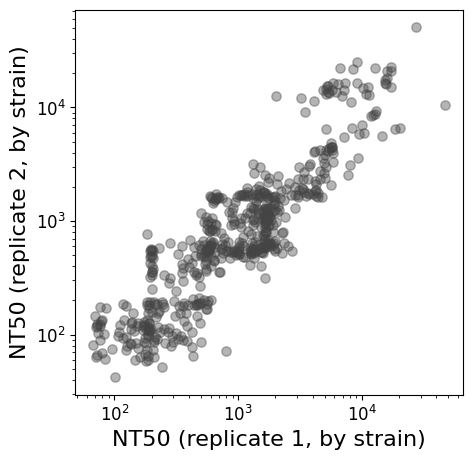

In [34]:
#Plot correlation by strain
merged_rep_filtered = merged_replicates.loc[merged_replicates['serum'].str.contains('D10191')]
correlation = merged_replicates.plot.scatter(x='NT50_rep1',y='NT50_rep2',loglog=True,c='#444444',s=45, xlabel='NT50 (replicate 1)', ylabel="NT50 (replicate 2)", fontsize=12,figsize=(5,5), alpha=0.4)
correlation.set_xlabel('NT50 (replicate 1, by strain)',fontdict= {'fontsize':16})
correlation.set_ylabel('NT50 (replicate 2, by strain)',fontdict= {'fontsize':16})
correlation

<Axes: xlabel='NT50 (replicate 1, by barcode)', ylabel='NT50 (replicate 2, by barcode)'>

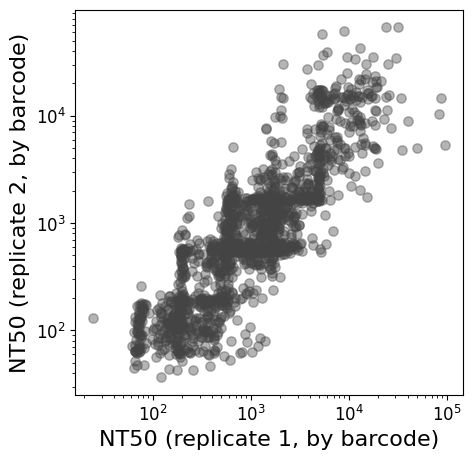

In [35]:
#Plot correlation by barcode
merged_replicates_withbarcodes_filtered = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['serum'].str.contains('D10191')]
correlation = merged_replicates_withbarcodes.plot.scatter(x='NT50_rep1',y='NT50_rep2',loglog=True,c='#444444',s=45, xlabel='NT50 (replicate 1)', ylabel="NT50 (replicate 2)", fontsize=12,figsize=(5,5), alpha=0.4)
correlation.set_xlabel('NT50 (replicate 1, by barcode)',fontdict= {'fontsize':16})
correlation.set_ylabel('NT50 (replicate 2, by barcode)',fontdict= {'fontsize':16})
correlation

In [36]:
#Add columns for naming samples and days
merged_replicates_withbarcodes['individual'] = "Participant " + merged_replicates_withbarcodes['serum'].str[0:6]
merged_replicates_withbarcodes['day'] = "Day " + merged_replicates_withbarcodes['serum'].str[7:]

merged_replicates['individual'] = "Participant " + merged_replicates['serum'].str[0:6]
merged_replicates['day'] = "Day " + merged_replicates['serum'].str[7:]

In [37]:
#Make plot showing correlation for samples run on same plate, both plates with replicates
alt.Chart(merged_replicates_withbarcodes).mark_point(filled=True).encode( 
    x=alt.X('NT50_rep1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, replicate 1")), 
    y=alt.Y('NT50_rep2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, replicate 2")),
    color =alt.Color('day:N', sort=['d0','d30','d182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen', 'firebrick']),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for barcodes for the same strain within the same plate", titleFontSize=24
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=12,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [38]:
#Make a dataframe where the first and second barcodes can be compared for each strain, first make dictionary and then add as column to plate
D10396 = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['individual'] == "Participant D10396"]
D10396 = D10396.loc[D10396['replicate_x'].str.contains('plate8')]
D10396 = D10396[['serum', 'virus', 'replicate_x','NT50_rep1']].copy()
#D10396_pivot = D10396.pivot(index='replicate_x',columns='virus')
D10396_dict = dict(zip(D10396['replicate_x'],D10396['virus']))

strain_dict = {}
replicate_mapping = {}
for i in D10396_dict:
    barcode = i
    strain = D10396_dict[i]
    if strain not in strain_dict:
        strain_dict[strain] = []
        strain_dict[strain].append(barcode)
        replicate_mapping[barcode] = 'bar1'
    else:
        if len(strain_dict[strain]) < 2:
            strain_dict[strain].append(barcode)
            replicate_mapping[barcode] = 'bar2'
D10396['replicate_barcode'] = D10396['replicate_x'].map(replicate_mapping)
D10396.dropna()

D10396_pivot = D10396.dropna().pivot(columns='replicate_barcode',values='NT50_rep1',index=['virus','serum']).reset_index()
D10396_pivot

replicate_barcode,virus,serum,bar1,bar2
0,A/Bangladesh/2221/2021,D10396d0,69.406861,177.854231
1,A/Bangladesh/2221/2021,D10396d30,1987.474391,1538.907320
2,A/Bangladesh/3210810034/2021,D10396d0,356.926537,190.702897
3,A/Bangladesh/3210810034/2021,D10396d30,1732.734226,1746.042525
4,A/Bangladesh/8002/2021,D10396d0,84.768191,64.792856
...,...,...,...,...
67,A/Utah/27/2022,D10396d30,1903.601867,2893.604679
68,A/Washington/23/2020,D10396d0,185.917699,NaN
69,A/Washington/23/2020,D10396d30,7227.854126,5098.977493
70,A/Wisconsin/588/2019,D10396d0,288.981241,111.698468


In [39]:
#Make a dataframe where the first and second barcodes can be compared for each strain, first make dictionary and then add as column to plate
plate13 = merged_replicates_withbarcodes.loc[merged_replicates_withbarcodes['replicate_y'].str.contains("plate13")]
plate13 = plate13[['serum', 'virus', 'replicate_y','NT50_rep1','individual','day']].copy()
#D10396_pivot = D10396.pivot(index='replicate_x',columns='virus')
plate13_dict = dict(zip(plate13['replicate_y'],plate13['virus']))

strain_dict = {}
replicate_mapping = {}
for i in plate13_dict:
    barcode = i
    strain = plate13_dict[i]
    if strain not in strain_dict:
        strain_dict[strain] = []
        strain_dict[strain].append(barcode)
        replicate_mapping[barcode] = 'bar1'
    else:
        if len(strain_dict[strain]) < 2:
            strain_dict[strain].append(barcode)
            replicate_mapping[barcode] = 'bar2'
plate13['replicate_barcode'] = plate13['replicate_y'].map(replicate_mapping)
plate13.dropna()

plate13_pivot = plate13.dropna().pivot(columns='replicate_barcode',values='NT50_rep1',index=['virus','serum','individual','day']).reset_index()

In [40]:
#Make a plot showing correlation in barcodes for all people on the same plate
alt.Chart(plate13_pivot).mark_point(filled=True).encode(
    alt.X(alt.repeat("column"), type='quantitative', scale=alt.Scale(type="log")),
    alt.Y(alt.repeat("row"), type='quantitative', scale=alt.Scale(type="log")),
    color='serum:N'
).properties(
    width=300,
    height=300
).repeat(
    row=['bar1'],
    column=['bar2']
).interactive().configure_axis(grid=False, domain=True)

alt.RepeatChart(...)

In [41]:
alt.Chart(plate13_pivot).mark_point(filled=True).encode( 
    x=alt.X('bar1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, barcode 1")), 
    y=alt.Y('bar2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, barcode 2")),
    color =alt.Color('day:N', sort=['d0','d30','d182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'mediumseagreen', 'firebrick']),
    opacity=alt.value(0.5),
    size=alt.value(55),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for replicate barcodes within the same plate", titleFontSize=20
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [42]:
#Check correlations for each person on plate
serum = plate13_pivot['individual'].unique().tolist()
for i in serum:
    test=plate13_pivot.loc[plate13_pivot['individual'] == i].corr(method="pearson", numeric_only=True)
    print(i, test)

Participant D10042 replicate_barcode      bar1      bar2
replicate_barcode                    
bar1               1.000000  0.823134
bar2               0.823134  1.000000
Participant D10191 replicate_barcode      bar1      bar2
replicate_barcode                    
bar1               1.000000  0.701236
bar2               0.701236  1.000000
Participant D10396 replicate_barcode      bar1      bar2
replicate_barcode                    
bar1               1.000000  0.763511
bar2               0.763511  1.000000


In [43]:
#Make correlation plot for plates run on separate days
alt.Chart(merged_replicates.loc[merged_replicates['individual'].str.contains('D10042|D10191|D10396')]).mark_point(filled=True).encode( 
    x=alt.X('NT50_rep1', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, plate A")), 
    y=alt.Y('NT50_rep2', scale=alt.Scale(type="log"),axis=alt.Axis(title="NT50, plate B")),
    color =alt.Color('day:N', sort=['Day 0','Day 30',' Day 182'], title="days post vaccination",legend=alt.Legend(orient='right',labelLimit= 0)).scale(range = ['rebeccapurple', 'firebrick', 'mediumseagreen']),
    opacity=alt.value(0.5),
    size=alt.value(55),
    facet=alt.Facet(
    "individual:N",
    header=alt.Header(
        labelFontSize=16, labelFontStyle="bold", labelPadding=0, title="Correlation in NT50s for each strain between plates run on different days", titleFontSize=20
    ),
    spacing=3,
    columns=3,
            )
).properties(width = 200, height = 200).configure_axis(grid=False, domain=False,labelFontSize=14,titleFontSize=16).configure_legend(titleAlign='left',labelLimit= 0,
titleFontSize=15,
labelFontSize=15
)

alt.Chart(...)

In [44]:
#Look at correlations for plots above
for i in serum:
    test=merged_replicates.loc[merged_replicates['individual'] == i].drop(columns = ['midpoint_x','midpoint_y','slope_x','slope_y']).corr(method="pearson", numeric_only=True)
    print(i, test)

Participant D10042            NT50_rep1  NT50_rep2
NT50_rep1   1.000000   0.949415
NT50_rep2   0.949415   1.000000
Participant D10191            NT50_rep1  NT50_rep2
NT50_rep1   1.000000   0.910785
NT50_rep2   0.910785   1.000000
Participant D10396            NT50_rep1  NT50_rep2
NT50_rep1   1.000000   0.961664
NT50_rep2   0.961664   1.000000
